In [1]:
# Import libraries
import networkx as nx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [235]:
# Load graph
# tsp5, tsp10, tsp20, tsp25
"""A simple reader for data file for TSP problem"""
import sys
filename = 'tsp5.txt'
with open('./data/'+filename) as data_file:
    nb = 0

    # first line is total number of vertices in file
    print("expected number of vertices : {0}\n".format(int(data_file.readline())))
    pos = []
    for line in data_file:
        pos.append(tuple(float(x) for x in line.split()))
        print("reading point {0}: {1}"
              .format(nb,tuple(float(x) for x in line.split())))
        
        nb = nb + 1

    print("\nnumber of vertices: {0}".format(nb))

G = nx.Graph([])
vertex = range(len(pos))
for i in vertex:
    for j in range(i, len(pos)):
        if i is j:
            continue
        G.add_edge(i, j, 
            weight=np.sqrt((pos[i][0] - pos[j][0])**2 + (pos[i][1]-pos[j][1])**2 )
        )

#G.adj

expected number of vertices : 5

reading point 0: (20833.3333, 17100.0)
reading point 1: (20900.0, 17066.6667)
reading point 2: (21300.0, 13016.6667)
reading point 3: (21600.0, 14150.0)
reading point 4: (21600.0, 14966.6667)

number of vertices: 5


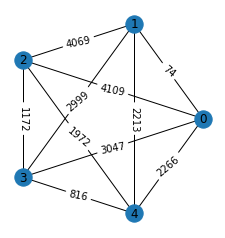

In [236]:
# View Graph
ax = plt.axes()

nx.draw_networkx(
    G, ax=ax,
    pos=nx.shell_layout(G)
)
nx.draw_networkx_edge_labels(
    G, ax=ax, pos=nx.shell_layout(G),
    edge_labels=dict(((u, v), int(G[u][v]['weight']))
                     for u, v in G.edges)
)

ax.set_aspect(1)
ax.set_axis_off()

In [469]:
import itertools
from collections import defaultdict

def HK(G):
    vertices = list(G.nodes())
    n = len(vertices)
    S = []
    S.append(list(tuple(i) for i in itertools.combinations(vertices[1:], 1)))
    L = defaultdict(dict)
    for i in range(1,n):
        L[tuple(S[0][i-1])][i] = G[0][i]['weight']
    
    for m in range(2,n):
        for s in itertools.combinations(vertices[1:], m):
            for j in s:
                s_j = list(s)
                s_j.remove(j)
                s_j = tuple(s_j)
                
                L[s][j] = min(list(L[s_j][k]+G[k][j]['weight'] for k in s_j))

    s = tuple(itertools.combinations(vertices[1:], n-1))
    return min(list(L[s[0]][j]+G[0][j]['weight'] for j in range(1,n)))
    

In [478]:
%%timeit
HK(G)

KeyboardInterrupt: 

## 10 cities

In [475]:
filename = 'tsp10.txt'
with open('./data/'+filename) as data_file:
    pos = []
    for line in data_file:
        pos.append(tuple(float(x) for x in line.split()))
    pos = pos[1:]

G = nx.Graph([])
vertex = range(len(pos))
for i in vertex:
    for j in range(i, len(pos)):
        if i is j:
            continue
        G.add_edge(i, j, 
            weight=np.sqrt((pos[i][0] - pos[j][0])**2 + (pos[i][1]-pos[j][1])**2 )
        )

%%timeit
HK(G)

12349.980743996226

## 20 cities

In [477]:
filename = 'tsp20.txt'
with open('./data/'+filename) as data_file:
    pos = []
    for line in data_file:
        pos.append(tuple(float(x) for x in line.split()))
    pos = pos[1:]

G = nx.Graph([])
vertex = range(len(pos))
for i in vertex:
    for j in range(i, len(pos)):
        if i is j:
            continue
        G.add_edge(i, j, 
            weight=np.sqrt((pos[i][0] - pos[j][0])**2 + (pos[i][1]-pos[j][1])**2 )
        )

HK(G)

23328.990366914215

## 25 cities

In [ ]:
filename = 'tsp25.txt'
with open('./data/'+filename) as data_file:
    pos = []
    for line in data_file:
        pos.append(tuple(float(x) for x in line.split()))
    pos = pos[1:]

G = nx.Graph([])
vertex = range(len(pos))
for i in vertex:
    for j in range(i, len(pos)):
        if i is j:
            continue
        G.add_edge(i, j, 
            weight=np.sqrt((pos[i][0] - pos[j][0])**2 + (pos[i][1]-pos[j][1])**2 )
        )

HK(G)